# Modelisation de la consommation totale d'energie

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.preprocessing as sk_prepro
from sklearn import metrics

In [64]:
df = pd.read_csv('data_full.csv')

In [98]:
data_num = df
target_tag = 'SiteEUI(kBtu/sf)'
target = data_num[target_tag]
label = ['TotalGHGEmissions', 'ENERGYSTARScore','SiteEnergyUse(kBtu)', 'GHGEmissionsIntensity']
sqf = data_num['PropertyGFABuilding(s)']
data_num = data_num.drop(labels = [target_tag, 'TotalGHGEmissions', 'ENERGYSTARScore','SiteEnergyUse(kBtu)', 'GHGEmissionsIntensity'], axis = 1)

col_name_lib = {}
col_name = data_num.columns
for i,v in enumerate(col_name):
    col_name_lib[f'{i}'] = v


In [67]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Columns: 522 entries, BuildingType_Campus to ThirdLargestPropertyUseTypeGFA
dtypes: float64(522)
memory usage: 6.5 MB


## Modèle linéaire

In [5]:
from sklearn.linear_model import Ridge
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor

In [99]:
#first let's test this on knregressoe
xtrain, xtest, ytrain, ytest, sqftrain, sqftest = train_test_split(data_num, target, sqf, test_size = 0.2)

df_res = xtest

#let's standard scale

sscaler = sk_prepro.StandardScaler()
sscaler_fit = sscaler.fit(xtrain)
xtrain = sscaler_fit.transform(xtrain)
xtest = sscaler_fit.transform(xtest)
#log scale the target
ytrain = np.log(ytrain)
ytest = np.log(ytest)

sqftrain = np.array(sqftrain).reshape(-1,1)
sqftest = np.array(sqftest).reshape(-1,1)

In [7]:
from sklearn import linear_model
line_reg = linear_model.LinearRegression()

In [80]:
def true_pred_plot(y_train,pred_train, y_test, pred_test):
    fig, ax = plt.subplots(2, figsize = (10,10))
    
    y_train= np.array(np.exp(y_train)).reshape(-1,1)
    pred_train = np.array(np.exp(pred_train)).reshape(-1,1)
    y_test = np.array(np.exp(y_test)).reshape(-1,1)
    pred_test = np.array(np.exp(pred_test)).reshape(-1,1)
    
    
    
    y_train = y_train*sqftrain
    pred_train = pred_train*sqftrain
    
    line_reg_train = line_reg.fit(pred_train,y_train)
    r2_train = line_reg_train.score(pred_train,y_train)
    rmse_train = (np.sqrt(metrics.mean_squared_error(y_train, pred_train))/np.mean(y_train))
    a = float(line_reg_train.coef_)
    b= line_reg_train.intercept_
    ax[0].scatter( y_train, pred_train)
    ax[0].plot([a*np.abs(b)+b, a*y_train.max()+b],[np.abs(b), y_train.max()], linestyle = 'dashed')
    ax[0].text(0.7,0.4,'R2 : {:.3f} NRMSE : {: .2f}'.format(r2_train,rmse_train), transform = ax[0].transAxes)
    ax[0].set_xlabel('True values')
    ax[0].set_ylabel('Predicted values')
    ax[0].set_xlim(y_train.min(),y_train.max())
    ax[0].set_ylim(pred_train.min(),pred_train.max())
    ax[0].set_title('On train values')

    y_test = y_test*sqftest
    pred_test = pred_test*sqftest
    
    line_reg_test  = line_reg.fit(pred_test,y_test)
    r2_test =  line_reg_test.score(pred_test,y_test)
    rmse_test = (np.sqrt(metrics.mean_squared_error(y_test, pred_test))/np.mean(y_test))
    a = float(line_reg_test.coef_)
    b=  line_reg_test.intercept_
    ax[1].scatter( y_test, pred_test)
    ax[1].plot([a*np.abs(b)+b, a*y_test.max()+b],[np.abs(b), y_test.max()], linestyle = 'dashed')
    ax[1].text(0.7,0.4,'R2 : {:.3f} NRMSE : {: .2f}'.format(r2_test, rmse_test), transform = ax[1].transAxes)
    ax[1].set_xlabel('True values')
    ax[1].set_ylabel('Predicted values')
    ax[1].set_xlim(y_test.min(),y_test.max())
    ax[1].set_ylim(pred_test.min(),pred_test.max())
    ax[1].set_title('On test values')
    
    plt.show()
    plt.clf()

E:\temp\ipykernel_9908\1743394803.py:7: RuntimeWarning: overflow encountered in exp
  pred_test = np.array(np.exp(pred_test)).reshape(-1,1)
E:\Data_Science\Anaconda\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

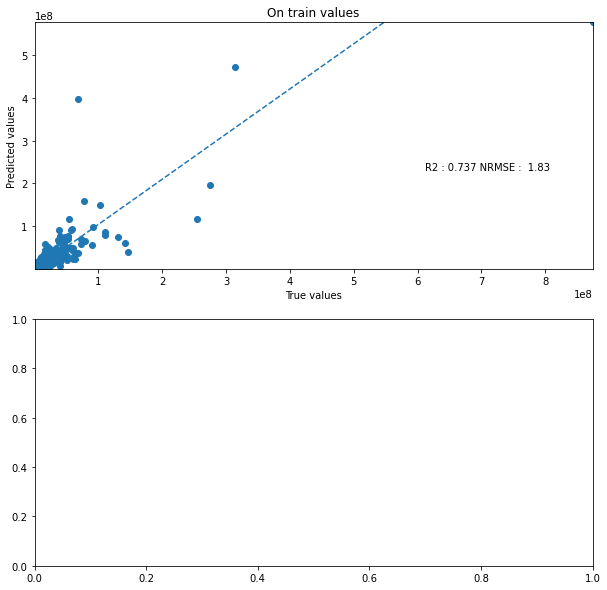

In [81]:
line_reg_m = linear_model.LinearRegression()

model_lr = line_reg_m.fit(xtrain,ytrain)


true_pred_plot(ytrain, model_lr.predict(xtrain), ytest, model_lr.predict(xtest))

Fitting 3 folds for each of 14 candidates, totalling 42 fits
Best params on training set : {'n_neighbors': 4}
GridCV results : 
r2 = 0.198 (+/- 0.098) for {'n_neighbors': 2}
r2 = 0.241 (+/- 0.067) for {'n_neighbors': 3}
r2 = 0.279 (+/- 0.053) for {'n_neighbors': 4}
r2 = 0.275 (+/- 0.061) for {'n_neighbors': 5}
r2 = 0.275 (+/- 0.060) for {'n_neighbors': 6}
r2 = 0.268 (+/- 0.048) for {'n_neighbors': 7}
r2 = 0.266 (+/- 0.035) for {'n_neighbors': 8}
r2 = 0.265 (+/- 0.032) for {'n_neighbors': 9}
r2 = 0.263 (+/- 0.023) for {'n_neighbors': 10}
r2 = 0.258 (+/- 0.025) for {'n_neighbors': 11}
r2 = 0.253 (+/- 0.024) for {'n_neighbors': 12}
r2 = 0.250 (+/- 0.023) for {'n_neighbors': 13}
r2 = 0.252 (+/- 0.015) for {'n_neighbors': 14}
r2 = 0.246 (+/- 0.025) for {'n_neighbors': 15}


E:\Data_Science\Anaconda\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
E:\Data_Science\Anaconda\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


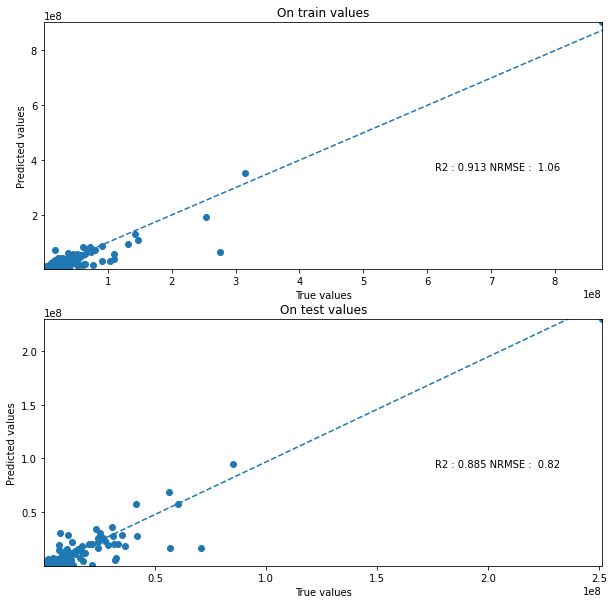

<Figure size 432x288 with 0 Axes>

In [82]:
#let's grid search for the k

k_grid = {'n_neighbors' : list(range(2,16))}
score = 'r2'

reg = GridSearchCV(KNeighborsRegressor(), k_grid, cv =3, scoring = score, verbose = 1)

reg.fit(xtrain, ytrain)

print('Best params on training set : {}'.format(reg.best_params_))

print('GridCV results : ')
for mean, std, k in zip(reg.cv_results_['mean_test_score'],
                       reg.cv_results_['std_test_score'],
                       reg.cv_results_['params']):
    print('{} = {:.3f} (+/- {:.3f}) for {}'.format(score,mean,std*2,k))
    
model_kn = KNeighborsRegressor(n_neighbors = reg.best_params_['n_neighbors']).fit(xtrain, ytrain)

true_pred_plot(ytrain, model_kn.predict(xtrain), ytest, model_kn.predict(xtest))

Do you want to launch ? [y/n] y


Fitting 3 folds for each of 120 candidates, totalling 360 fits
Best params on training set : {'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'}


E:\Data_Science\Anaconda\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
E:\Data_Science\Anaconda\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


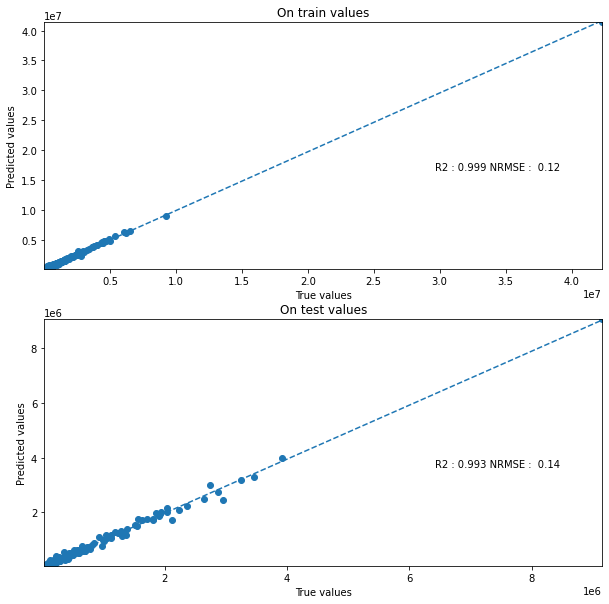

<Figure size 432x288 with 0 Axes>

In [13]:
x = input('Do you want to launch ? [y/n]')
if x == 'y':

    #let's try with a svr
    C_range = [1.0, 5.0, 10.0, 100.0]
    kernels = ['linear', 'rbf', 'sigmoid', 'poly']
    degrees = [2,3,4]
    gamma_range  = np.logspace(-2, 1, 10)
    #gamma_range = np.logspace(-2, 1, 10)
    #'gamma' : gamma_range
    param_grid = {'gamma' : gamma_range, 'kernel' : kernels, 'degree' : degrees}

    score = 'neg_mean_squared_error'

    svr_cv = GridSearchCV(svm.SVR(), param_grid, cv = 3, scoring = score, verbose = 1)

    svr_cv.fit(xtrain, ytrain)

    print('Best params on training set : {}'.format(svr_cv.best_params_))
bkernel = svr_cv.best_params_['kernel']
bgamma = svr_cv.best_params_['gamma']
bdegree = svr_cv.best_params_['degree']
    
svr = svm.SVR(kernel=bkernel, C=1.0, gamma = bgamma, degree = bdegree)
model_svr = svr.fit(xtrain,ytrain)

true_pred_plot(ytrain, model_svr.predict(xtrain), ytest, model_svr.predict(xtest))

Do you want to launch ? [y/n] y


Fitting 3 folds for each of 360 candidates, totalling 1080 fits


E:\Data_Science\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=5.62218e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
E:\Data_Science\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=1.07067e-16): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
E:\Data_Science\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=4.07902e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
E:\Data_Science\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=2.7422e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)
E:\Data_Science\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py

Best params on training set : {'alpha': 5.0, 'degree': 3, 'gamma': 0.01, 'kernel': 'poly'}


E:\Data_Science\Anaconda\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
E:\Data_Science\Anaconda\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


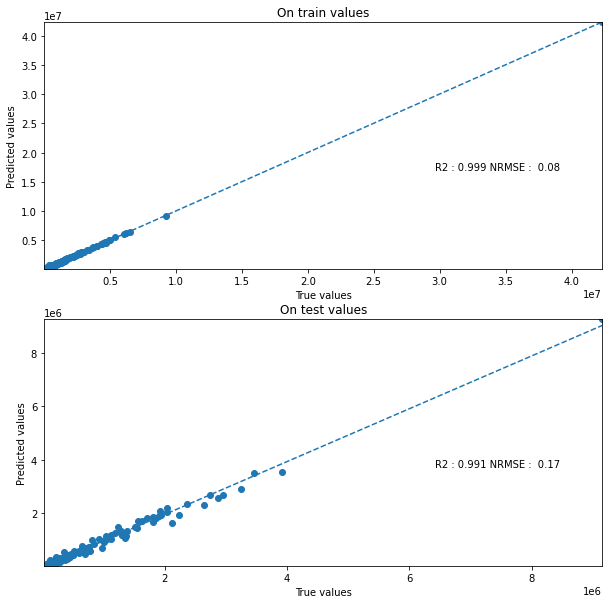

<Figure size 432x288 with 0 Axes>

In [14]:
from sklearn import kernel_ridge
#let's try with a ridge regression

x = input('Do you want to launch ? [y/n]')
if x == 'y':
    alpha_range = [1.0, 5.0, 10.0, 100.0]
    kernels = ['linear', 'poly', 'rbf']
    degrees = [3,4,5]
    gamma_range  = np.logspace(-2, 1, 10)


    param_grid = {'gamma' : gamma_range, 'kernel' : kernels, 'degree' : degrees, 'alpha' : alpha_range}
    
    score = 'neg_mean_absolute_percentage_error'

    kernel_ridge_cv = GridSearchCV(kernel_ridge.KernelRidge(), param_grid, cv = 3, scoring = score, verbose = 1)

    kernel_ridge_cv.fit(xtrain, ytrain)

    print('Best params on training set : {}'.format(kernel_ridge_cv.best_params_))
    
bkernel = kernel_ridge_cv.best_params_['kernel']
bgamma = kernel_ridge_cv.best_params_['gamma']
bdegree = kernel_ridge_cv.best_params_['degree']
balpha = kernel_ridge_cv.best_params_['alpha']

model = kernel_ridge.KernelRidge(alpha = balpha, kernel = bkernel, degree = bdegree, gamma = bgamma)
model_krr = model.fit(xtrain, ytrain)

true_pred_plot(ytrain, model_krr.predict(xtrain), ytest, model_krr.predict(xtest))

## Neural network

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [16]:
#test with a single perceptron
model1 = keras.Sequential()
model1.add(keras.Input(shape = xtrain.shape[1]))
model1.add(layers.Dense(1,input_dim = 2, activation = 'linear'))

model1.compile(metrics = [tf.keras.metrics.RootMeanSquaredError()], loss = 'mean_absolute_percentage_error', optimizer = 'adam')

model1.summary()

history1 = model1.fit(xtrain, ytrain, epochs = 50, batch_size = 1, verbose = 1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 523       
                                                                 
Total params: 523
Trainable params: 523
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1304/1304 [==============================] - 2s 847us/step - loss: 116.2811 - root_mean_squared_error: 8.2136
Epoch 2/50
1304/1304 [==============================] - 1s 883us/step - loss: 90.5839 - root_mean_squared_error: 7.2966
Epoch 3/50
1304/1304 [==============================] - 1s 850us/step - loss: 80.3729 - root_mean_squared_error: 6.6873
Epoch 4/50
1304/1304 [==============================] - 1s 881us/step - loss: 71.3729 - root_mean_squared_error: 6.1357
Epoch 5/50
1304/1304 [==============================] - 1s 880us/step - loss: 63.5728 - root_mean_squared

11/11 [==============================] - 0s 800us/step


E:\Data_Science\Anaconda\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
E:\Data_Science\Anaconda\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


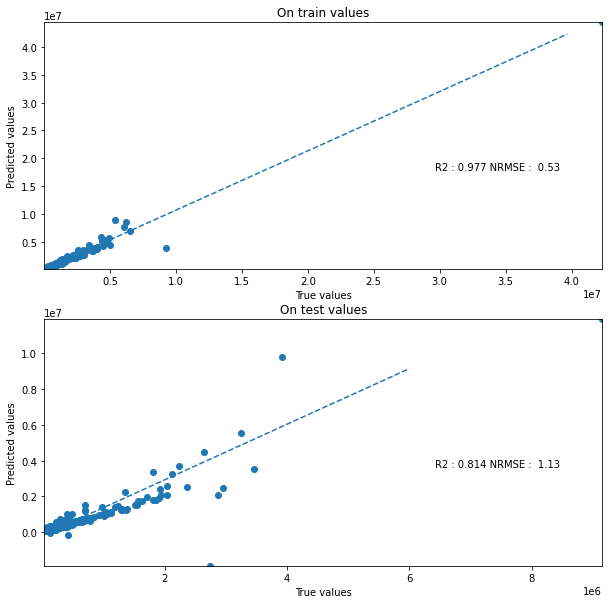

<Figure size 432x288 with 0 Axes>

In [17]:
true_pred_plot(ytrain, np.array(model1.predict(xtrain)).reshape(-1,1), ytest, np.array(model1.predict(xtest)).reshape(-1,1))

In [18]:
model2 = keras.Sequential(
    [
        layers.Dense(xtrain.shape[1], activation="selu", name="layer1", input_shape=(xtrain.shape[1],), input_dim = 2),
        layers.Dense(287, activation="selu", name="layer2"),
        layers.Dense(1, activation = 'linear', name="layer3"),
    ]
)

model2.compile(metrics = [tf.keras.metrics.RootMeanSquaredError()], loss = 'mean_absolute_percentage_error', optimizer = 'adam')

model2.summary()

history2 = model2.fit(xtrain, ytrain, epochs = 50, batch_size = 1, verbose = 1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 522)               273006    
                                                                 
 layer2 (Dense)              (None, 287)               150101    
                                                                 
 layer3 (Dense)              (None, 1)                 288       
                                                                 
Total params: 423,395
Trainable params: 423,395
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1304/1304 [==============================] - 3s 2ms/step - loss: 60.4403 - root_mean_squared_error: 3.4524
Epoch 2/50
1304/1304 [==============================] - 3s 2ms/step - loss: 31.1466 - root_mean_squared_error: 1.5492
Epoch 3/50
1304/1304 [==============================] - 3s 2ms/step - loss: 

11/11 [==============================] - 0s 2ms/step


E:\Data_Science\Anaconda\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
E:\Data_Science\Anaconda\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


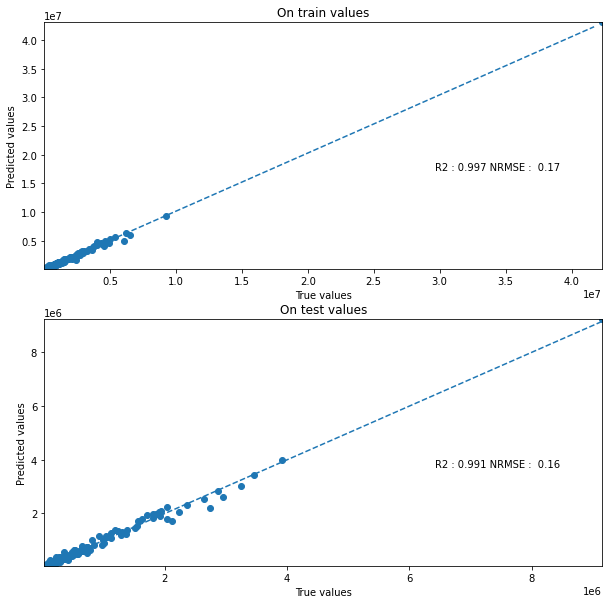

<Figure size 432x288 with 0 Axes>

In [19]:
true_pred_plot(ytrain, model2.predict(xtrain), ytest, model2.predict(xtest))

In [20]:
#now with a multi layer network

model3 = keras.Sequential(
    [
        layers.Dense(xtrain.shape[1], activation="selu", name="layer1", input_shape=(xtrain.shape[1],), input_dim = 2),
        layers.Dense(383, activation="selu", name="layer2a"),
        layers.Dense(287, activation="selu", name="layer2"),
        layers.Dense(82, activation="selu", name="layer3"),
        layers.Dense(20, activation="selu", name="layer4"),
        layers.Dense(1, activation = 'linear', name="layer6"),
    ]
)

model3.compile(metrics = [tf.keras.metrics.RootMeanSquaredError()], loss = 'mean_absolute_percentage_error', optimizer = 'adam')

model3.summary()

history3 = model3.fit(xtrain, ytrain, epochs = 50, batch_size = 1, verbose = 1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 522)               273006    
                                                                 
 layer2a (Dense)             (None, 383)               200309    
                                                                 
 layer2 (Dense)              (None, 287)               110208    
                                                                 
 layer3 (Dense)              (None, 82)                23616     
                                                                 
 layer4 (Dense)              (None, 20)                1660      
                                                                 
 layer6 (Dense)              (None, 1)                 21        
                                                                 
Total params: 608,820
Trainable params: 608,820
Non-tr

11/11 [==============================] - 0s 2ms/step


E:\Data_Science\Anaconda\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
E:\Data_Science\Anaconda\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


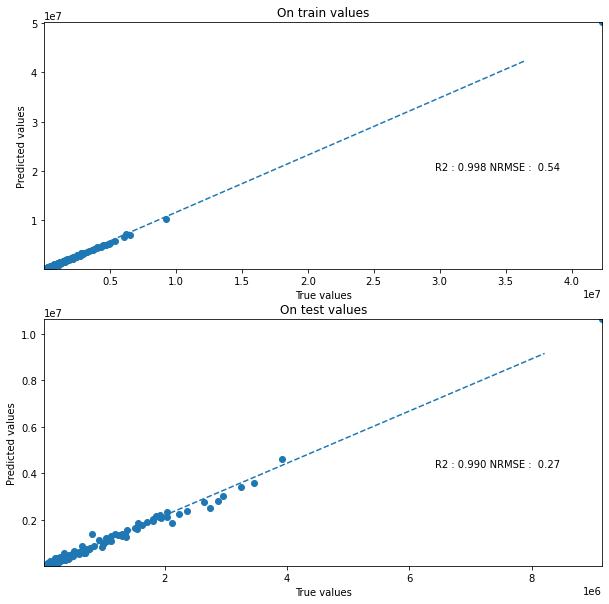

<Figure size 432x288 with 0 Axes>

In [21]:
true_pred_plot(ytrain, model3.predict(xtrain), ytest, model3.predict(xtest))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params on training set : {'n_estimators': 400}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    9.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished
E:\Data_Science\Anaconda\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
E:\Data_Science\Anaconda\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or

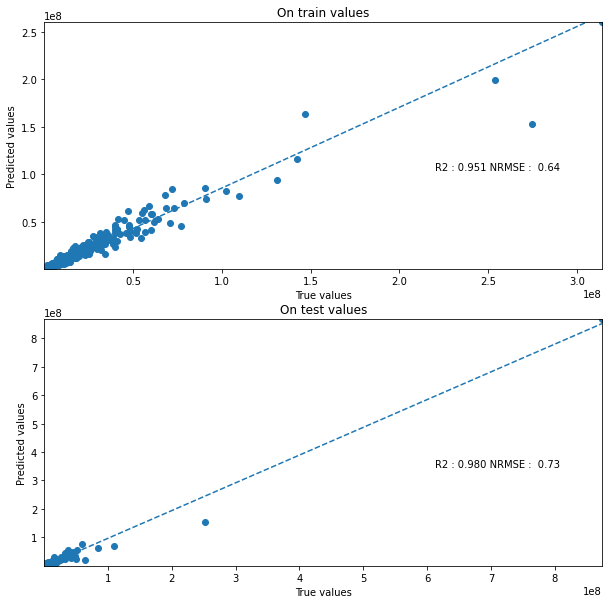

<Figure size 432x288 with 0 Axes>

In [140]:
from sklearn.ensemble import RandomForestRegressor

n_grid = {'n_estimators' : list(np.arange(50,550,50))}
score = 'r2'

rfr_grid = GridSearchCV(RandomForestRegressor(), n_grid, cv =3, scoring = score, verbose = 1)

rfr_grid.fit(xtrain, ytrain)

print('Best params on training set : {}'.format(rfr_grid.best_params_))

    
model_rfr = RandomForestRegressor(n_estimators=rfr_grid.best_params_['n_estimators'], verbose = 1).fit(xtrain, ytrain)

true_pred_plot(ytrain, model_rfr.predict(xtrain), ytest, model_rfr.predict(xtest))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params on training set : {'n_estimators': 500}


E:\Data_Science\Anaconda\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)
E:\Data_Science\Anaconda\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


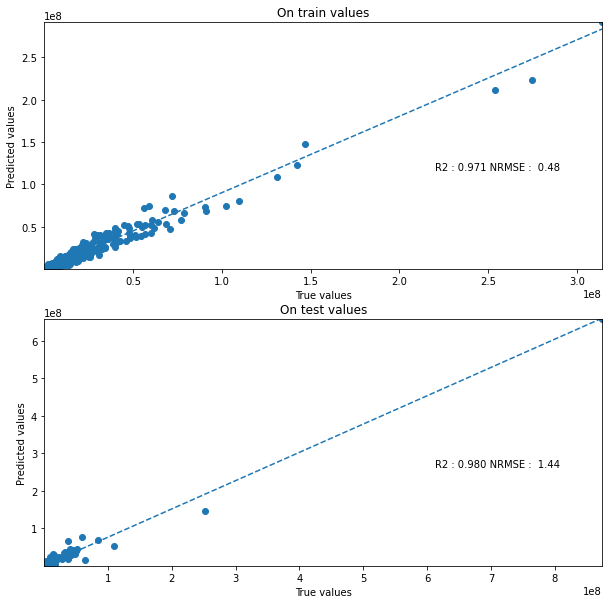

<Figure size 432x288 with 0 Axes>

In [166]:
from sklearn.ensemble import GradientBoostingRegressor

n_grid = {'n_estimators' : list(np.arange(50,550,50))}
score = 'r2'

xgb_grid = GridSearchCV(GradientBoostingRegressor(), n_grid, cv =3, scoring = score, verbose = 1)

xgb_grid.fit(xtrain, ytrain)

print('Best params on training set : {}'.format(xgb_grid.best_params_))

    
model_xgb = GradientBoostingRegressor(n_estimators=xgb_grid.best_params_['n_estimators']).fit(xtrain, ytrain)

true_pred_plot(ytrain, model_xgb.predict(xtrain), ytest, model_xgb.predict(xtest))

In [25]:
def r2(pred,y):
    pred = np.array(pred).reshape(-1,1)
    y = np.array(y).reshape(-1,1)
    
    pred = pred*sqftest
    y = y*sqftest
    
    line_reg_test  = line_reg.fit(pred,y)
    r2_value =  line_reg_test.score(pred,y)
    return r2_value

def rmse(pred,y):
    pred = np.array(pred).reshape(-1,1)
    y = np.array(y).reshape(-1,1)
    
    pred = pred*sqftest
    y = y*sqftest
    
    rmse_value = np.sqrt(metrics.mean_squared_error(y,pred))
    return rmse_value

def nrmse(pred,y):
    pred = np.array(pred).reshape(-1,1)
    y = np.array(y).reshape(-1,1)
    
    pred = pred*sqftest
    y = y*sqftest
    
    nrmse_value = (np.sqrt(metrics.mean_squared_error(y,pred))/np.mean(y))
    return nrmse_value
                   
def mae(pred,y):
    pred = np.array(pred).reshape(-1,1)
    y = np.array(y).reshape(-1,1)
    
    pred = pred*sqftest
    y = y*sqftest
    
    mae_value = metrics.mean_absolute_error(y,pred)
    return mae_value
            

11/11 [==============================] - 0s 3ms/step


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 350 out of 350 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

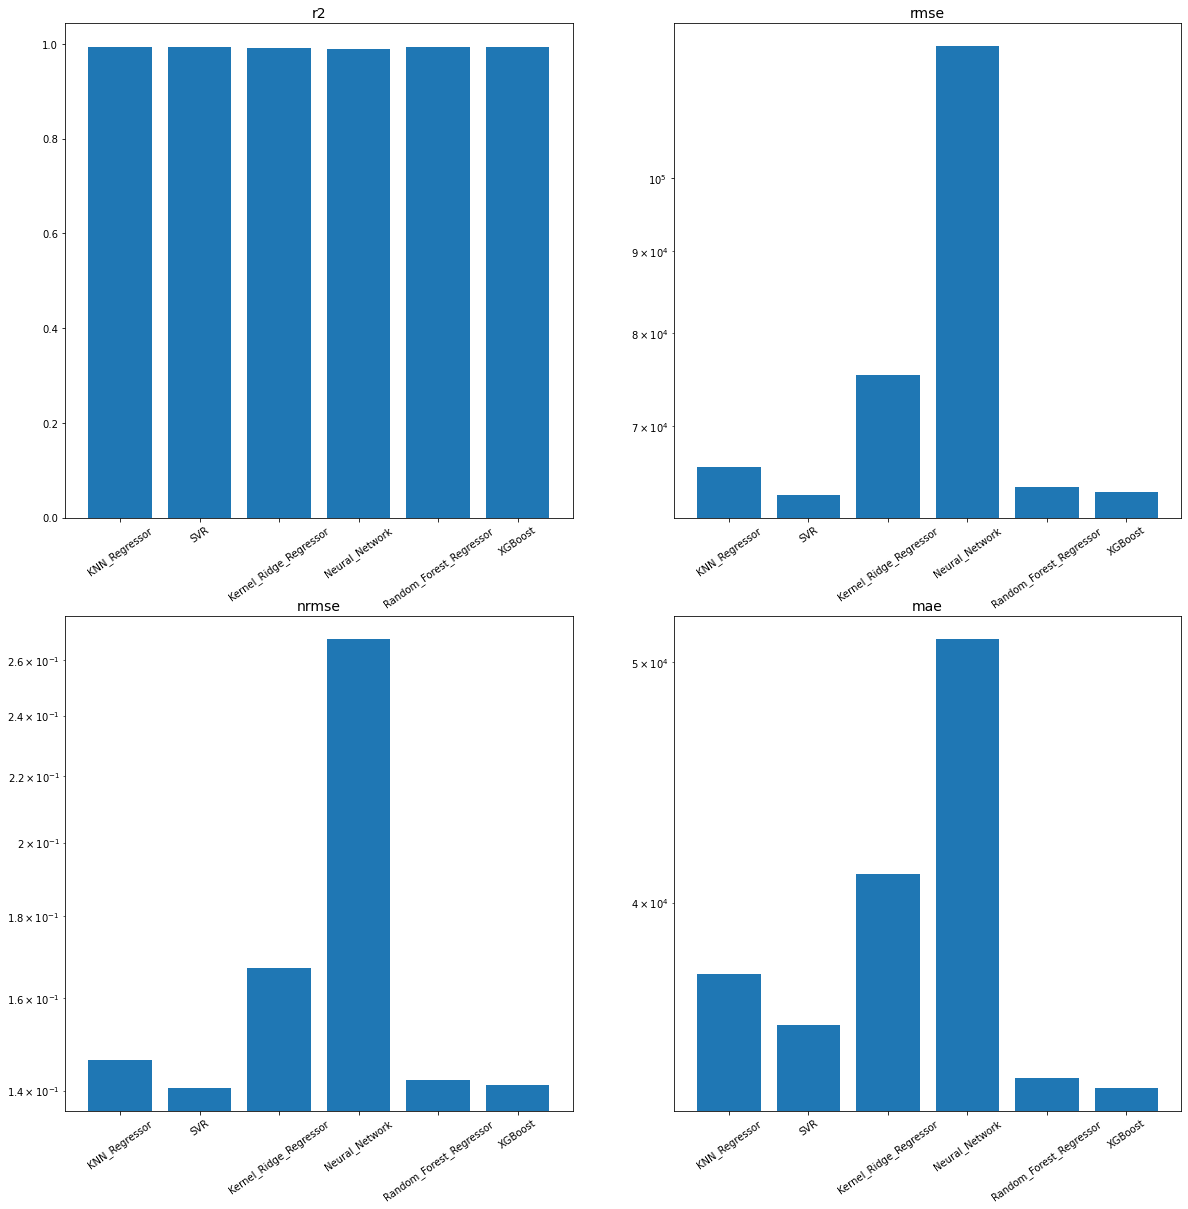

In [48]:
metrics_all = {}

models = [model_kn,svr,model_krr,model3,model_rfr,model_xgb]
r2l=[]
rmsel=[]
nrmsel=[]
mael=[]

for i in models:
    r2l.append(r2(i.predict(xtest),ytest))
    rmsel.append(rmse(i.predict(xtest), ytest))
    nrmsel.append(nrmse(i.predict(xtest), ytest))
    mael.append(mae(i.predict(xtest), ytest))
    
metrics_all['r2'] = r2l
metrics_all['rmse'] = rmsel
metrics_all['nrmse'] = nrmsel
metrics_all['mae'] = mael

model_names = ['KNN_Regressor', 'SVR', 'Kernel_Ridge_Regressor','Neural_Network', 'Random_Forest_Regressor', 'XGBoost']
df_metrics = pd.DataFrame(metrics_all, index = model_names)

fig = plt.figure(figsize=(20, 20))
for i in range(df_metrics.shape[1]):
    ax = fig.add_subplot(2,2, (i+1))
    b = ax.bar(x=df_metrics.index,height = df_metrics.iloc[:, i])
    ax.set_title(df_metrics.columns[i], fontsize=14)
    ax.tick_params(axis='x', labelrotation = 35)
    if i != 0:
        ax.set_yscale('log')

47
ThirdLargestPropertyUseTypeGFA     0.201290
Neighborhood_EAST                  0.101369
PropertyGFABuilding(s)             0.098217
Neighborhood_DOWNTOWN              0.054795
SecondLargestPropertyUseTypeGFA    0.053567
YearBuilt                          0.039232
Latitude                           0.039173
Longitude                          0.037143
Neighborhood_Central               0.027207
ZipCode                            0.023479
Name: Feature_Importance, dtype: float64


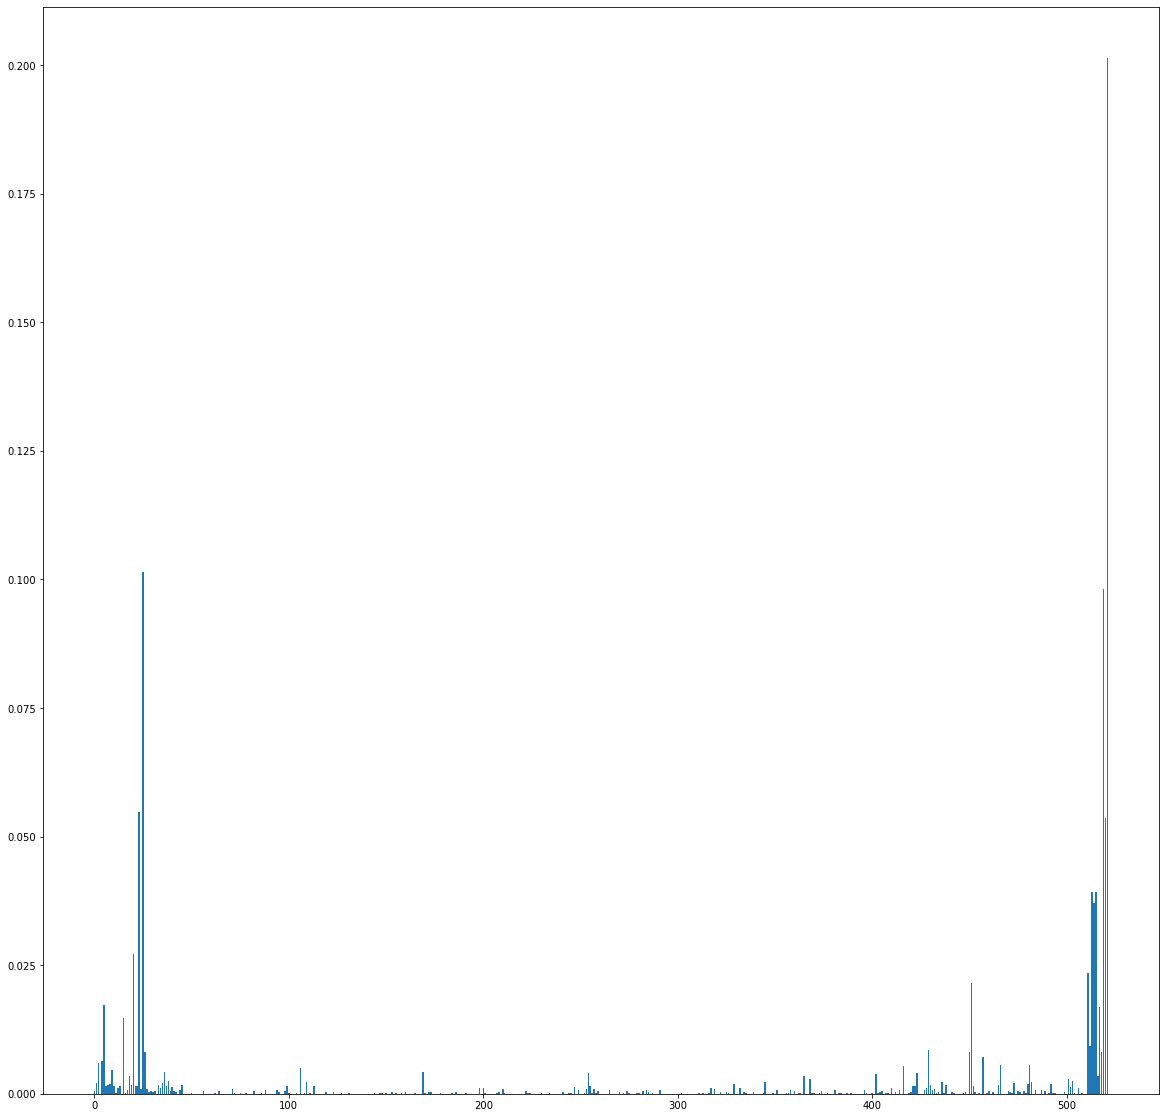

In [79]:
importance = model_xgb.feature_importances_
nul_col = []
for i,v in enumerate(importance):
    if v == 0:
        nul_col.append(i)
nul_col_name = []
for i in nul_col:
    nul_col_name.append(col_name_lib[str(i)])
print(len(nul_col_name))

df_fi = {}
for i,v in enumerate(importance):
    x = col_name_lib[str(i)]
    df_fi[f'{x}'] = v

df_fi = pd.DataFrame(df_fi, index = ['Feature_Importance']).T
print(df_fi['Feature_Importance'].nlargest(10))


# plot feature importance
fig, ax = plt.subplots(figsize = (20,20))
ax.bar([x for x in range(len(importance))], importance)
plt.show()

In [121]:
df_year={}
df_tar = pd.DataFrame(ytest)
df_res = df_res.join(df_tar)
for i in df_res['YearBuilt'].unique():
    df_year[f'{i}'] = df_res[df_res['YearBuilt'] == i]
len(df_year)



102

In [136]:
df_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326 entries, 426 to 911
Columns: 523 entries, BuildingType_Campus to SiteEUI(kBtu/sf)
dtypes: float64(523)
memory usage: 1.3 MB


In [171]:
def feature_error(df_lib,model):
    results = []
    for i in df_lib:
        x = df_lib[str(i)]
        y = x['SiteEUI(kBtu/sf)']
        x = x.drop(axis = 1, labels = 'SiteEUI(kBtu/sf)')
        sqf = x['PropertyGFABuilding(s)']
        x = sscaler_fit.transform(x)
        
        y = np.array(np.log(y)).reshape(-1,1)     
        pred = model.predict(x)
        
        y = np.array(y).reshape(-1,1)
        pred = np.array(pred).reshape(-1,1)
        
        sqf = np.array(sqf).reshape(-1,1)
        y = y*sqf
        pred = pred*sqf
        
        results.append((np.sqrt(metrics.mean_absolute_error(y,pred))))
    return results
    

In [172]:
results = feature_error(df_year,model_xgb)

print(results)

[314.41002011372416, 917.2351986759892, 365.67261516752126, 1006.0612350491849, 322.6533266724586, 386.5727488691059, 599.5970729531384, 321.44893362521395, 495.27937227434023, 404.58191018476975, 497.6495050796516, 432.87971552123093, 498.95358404045857, 421.8531088447299, 397.44937775861223, 362.82244101468024, 708.6850073999544, 463.12384403503876, 342.6517525363599, 480.0911778804523, 276.97011203506804, 689.0845588431459, 389.15651140981674, 466.0706010233609, 414.0118875750069, 364.2722955274454, 1824.9878699413312, 624.4607686951775, 653.7060616592587, 701.0681816367708, 408.81088992422127, 540.0133498585802, 263.3550381279829, 256.0608635150237, 317.14743928366664, 478.2220527298108, 238.63103967690938, 435.5708263431725, 319.0509736983489, 336.8026769050599, 848.9406299154905, 507.20180437804936, 695.00493771647, 281.04660022267507, 794.067448175213, 459.7582937144326, 238.45680834607322, 605.6991789878851, 389.7584719488139, 565.116844194926, 1201.966611904106, 643.4031806822

In [169]:
results_year['RMSE'].mean()

KeyError: 'RMSE'

1900.0    1824.987870
1999.0    1201.966612
1922.0    1006.061235
1929.0     970.266762
2006.0     917.235199
2000.0     848.940630
2015.0     822.690411
1916.0     794.067448
1981.0     729.260808
2008.0     708.685007
Name: NRMSE, dtype: float64


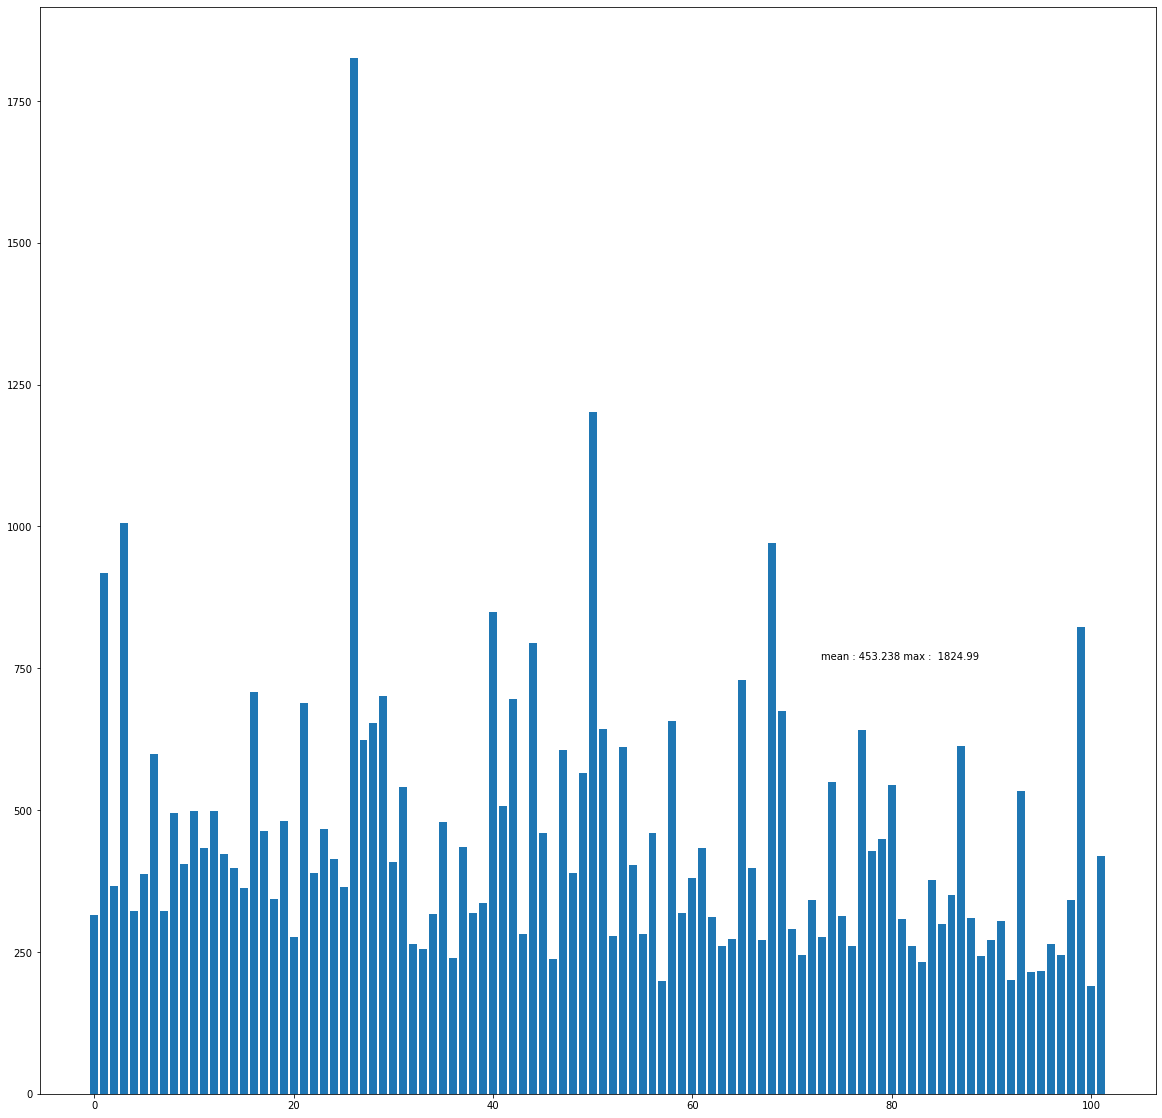

In [173]:
results_year = {}
for i,v in zip(df_year,results):
    results_year[f'{i}'] = v
    
results_year = pd.DataFrame(results_year, index = ['NRMSE']).T
print(results_year['NRMSE'].nlargest(10))

fig, ax = plt.subplots(figsize = (20,20))
ax.bar([x for x in range(len(results_year.index))],results_year['NRMSE'])
ax.text(0.7,0.4,'mean : {:.3f} max : {: .2f}'.format(results_year['NRMSE'].mean(), results_year['NRMSE'].max()), transform = ax.transAxes)
plt.show()

### Etude de l'impact de l'Energy Score

In [ ]:

data_num = df
target_tag = 'SiteEUI(kBtu/sf)'
target = data_num[target_tag]
label = ['TotalGHGEmissions', 'ENERGYSTARScore','SiteEnergyUse(kBtu)', 'GHGEmissionsIntensity']
sqf = data_num['PropertyGFABuilding(s)']
data_num = data_num.drop(labels = [target_tag, 'TotalGHGEmissions','SiteEnergyUse(kBtu)', 'GHGEmissionsIntensity'], axis = 1)

#first let's test this on knregressoe
xtrain, xtest, ytrain, ytest, sqftrain, sqftest = train_test_split(data_num, target, sqf, test_size = 0.2)

df_res = xtrain

#let's standard scale

sscaler = sk_prepro.StandardScaler()
sscaler_fit = sscaler.fit(xtrain)
xtrain = sscaler_fit.transform(xtrain)
xtest = sscaler_fit.transform(xtest)
#log scale the target
ytrain = np.log(ytrain)
ytest = np.log(ytest)

sqftrain = np.array(sqftrain).reshape(-1,1)
sqftest = np.array(sqftest).reshape(-1,1)